# New York City Taxi Fare Prediction


### Can you predict a rider's taxi fare?


Data fields

ID

    key - Unique string identifying each row in both the training and test sets. Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field. Required in your submission CSV. Not necessarily needed in the training set, but could be useful to simulate a 'submission file' while doing cross-validation within the training set.
    
Features

    pickup_datetime - timestamp value indicating when the taxi ride started.
    pickup_longitude - float for longitude coordinate of where the taxi ride started.
    pickup_latitude - float for latitude coordinate of where the taxi ride started.
    dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
    dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
    passenger_count - integer indicating the number of passengers in the taxi ride.
    
Target

    fare_amount - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

### Competição e dados disponível em: 

https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview

# Know the Data!

In [1]:
# Importando as bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Lendo os arquivos:

PATH = r'C:\Users\rodribia\Documents/'
# train = pd.read_csv(PATH+'train.csv.zip')
test = pd.read_csv(PATH +'test.csv')

In [3]:
#informações
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [4]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [5]:
def haversine_distance(train):
    
    #https://pt.wikipedia.org/wiki/F%C3%B3rmula_de_Haversine
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

In [6]:
train = pd.read_csv(PATH+'train.csv.zip', chunksize=100000)

chunk_list = []  # append each chunk df here 
i = 0


# Each chunk is in df format
for chunk in train:  
    
    i +=1
    if i > 10:
        break
        
    # perform data filtering 
    chunk_filter = chunk.copy()
    
    chunk_filter['distance_km'] = haversine_distance(chunk_filter)

    chunk_filter = chunk_filter.drop(
        ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk_filter)
    
    print('Chunk número {} executado!'.format(i))
    
# concat the list into dataframe 
df_concat = pd.concat(chunk_list)

Chunk número 1 executado!
Chunk número 2 executado!
Chunk número 3 executado!
Chunk número 4 executado!
Chunk número 5 executado!
Chunk número 6 executado!
Chunk número 7 executado!
Chunk número 8 executado!
Chunk número 9 executado!
Chunk número 10 executado!


In [7]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
key                1000000 non-null object
fare_amount        1000000 non-null float64
pickup_datetime    1000000 non-null object
passenger_count    1000000 non-null int64
distance_km        999990 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 38.1+ MB


In [42]:
test['distance_km'] = haversine_distance(test)

test = test.drop(
        ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1)

In [8]:
train = df_concat.copy()

# EDA

In [48]:
# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Train distribution of passengers within rides
train['passenger_count'].value_counts()

Train shape: (996434, 6)
Test shape: (9914, 4)


1    691344
2    148105
5     70595
3     43765
4     21429
6     21196
Name: passenger_count, dtype: int64

In [11]:
test.passenger_count.value_counts()

1    6914
2    1474
5     696
3     447
4     206
6     177
Name: passenger_count, dtype: int64

In [26]:
train = train.drop(train[train['passenger_count']<1].index, axis=0)

In [27]:
train = train.drop(train[train['passenger_count']>6].index, axis=0)

In [28]:
train['passenger_count'].value_counts()

1    691344
2    148105
5     70595
3     43765
4     21429
6     21196
Name: passenger_count, dtype: int64

In [30]:
train.isnull().sum()

key                0
fare_amount        0
pickup_datetime    0
passenger_count    0
distance_km        0
hour               0
dtype: int64

In [31]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [35]:
train['distance_km'].describe()

count    996434.000000
mean         18.905120
std         360.148365
min           0.000000
25%           1.213036
50%           2.116542
75%           3.884115
max       16878.303157
Name: distance_km, dtype: float64

In [51]:
test['distance_km'].describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance_km, dtype: float64

In [52]:
train = train.drop(train[train['distance_km']>100].index, axis=0)

In [55]:
train['distance_km'].describe()

count    994281.000000
mean          3.267403
std           3.725332
min           0.000000
25%           1.211529
50%           2.111926
75%           3.864420
max          99.923505
Name: distance_km, dtype: float64

Text(0.5, 1.0, 'Fare amount based on the distance')

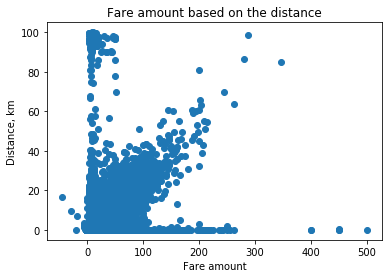

In [54]:
# Draw a scatterplot

plt.scatter(train.fare_amount, train.distance_km)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')


(0, 40)

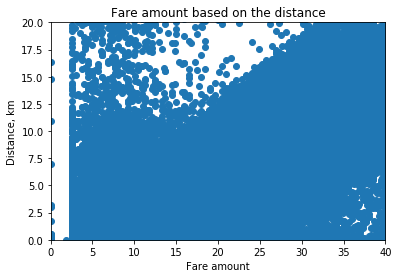

In [56]:
# Draw a scatterplot

plt.scatter(train.fare_amount, train.distance_km)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')
plt.ylim(0, 20)
plt.xlim(0, 40)

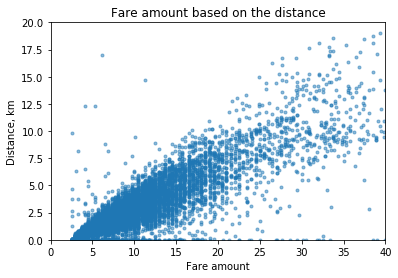

In [59]:
# Draw a scatterplot

df_sample=train.sample(10000)

plt.scatter(df_sample.fare_amount, df_sample.distance_km, alpha=0.5, marker='.')
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')
plt.ylim(0, 20)
plt.xlim(0, 40)
plt.show()

In [60]:
train = train.drop(train[train['fare_amount']>200].index, axis=0)

# Baseline Model 1

In [92]:
# Assign the mean fare amount to all the test observations
train['baseline_ans'] = np.mean(train.fare_amount)

# Score
mean_squared_error(train['baseline_ans'], train.fare_amount)

93.3414541117387

In [94]:
# Competition score
np.sqrt(mean_squared_error(train['baseline_ans'], train.fare_amount))

9.661338111863113

In [95]:
train = train.drop('baseline_ans', axis=1)

# Feature Engineering

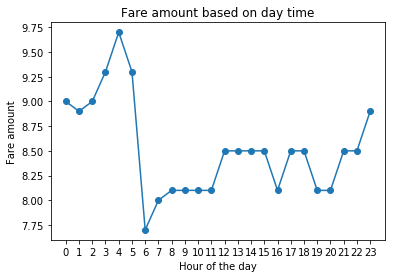

In [61]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price.hour, hour_price.fare_amount, marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

In [63]:
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
test['hour'] = test.pickup_datetime.dt.hour

In [64]:
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
test['dayofweek'] = test['pickup_datetime'].dt.dayofweek

# Baseline Model 2

In [84]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train.drop(['pickup_datetime', 'key'], axis=1), y_train)

# Make predictions on the test data
predict = rf.predict(X_val.drop(['pickup_datetime', 'key'], axis=1))

# Score
mean_squared_error(predict, y_val)

C:\Users\rodribia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


27.876427805827873

In [91]:
# Competition score
np.sqrt(mean_squared_error(predict, y_val))

5.279813235885136

In [89]:
# Make predictions on the test data
test['fare_amount'] = rf.predict(test.drop(['pickup_datetime', 'key'], axis=1))

# Write predictions to the file
test[['key','fare_amount']].to_csv('baseline.csv', index=False)

![fig](baseline.PNG)

### Posição 1107/1486  

![fig](placar.PNG)

# Hyperparameter tuning

In [ ]:
def get_score(train, param):

    # Train a Random Forest model
    rf = RandomForestRegressor()
    rf.fit(X_train.drop(['pickup_datetime', 'key'], axis=1), y_train)

    # Make predictions on the test data
    predict = rf.predict(X_val.drop(['pickup_datetime', 'key'], axis=1))

    # Score
    return np.round(np.sqrt(mean_squared_error(predict, y_val), 5)

In [96]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

param_grid = {
    'max_depth': [5, 10, 50],
    'n_estimators': [100]
}

In [97]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [98]:
# Fit the grid search to the data
grid_search.fit()X_train.drop(['pickup_datetime', 'key'], axis=1), y_train

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  4.0min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  7.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 50], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [99]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [103]:
predict = grid_search.predict(X_val.drop(['pickup_datetime', 'key'], axis=1))

In [104]:
# Competition score
np.sqrt(mean_squared_error(predict, y_val))

4.78664713802957

# Model ensembling

In [106]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor().fit(X_train.drop(['pickup_datetime', 'key'], axis=1), y_train)

# Train a Random Forest model
####### rf = RandomForestRegressor().fit(X_val.drop(['pickup_datetime', 'key'], axis=1))

# Make predictions on the test data
prediction_gb = gb.predict(X_val.drop(['pickup_datetime', 'key'], axis=1))
####### prediction_rf = rf.predict(test[features])

# Competition scores
np.sqrt(mean_squared_error(prediction_gb, y_val))

4.8012550704327905

In [109]:
# Find mean of model predictions
blend = (prediction_gb + predict) / 2
np.sqrt(mean_squared_error(blend, y_val))

4.786030662354441

# Model Stacking 

In [117]:
features = ['passenger_count', 'distance_km', 'hour', 'dayofweek']

# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

In [118]:
# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

In [119]:
from sklearn.linear_model import LinearRegression

# Create linear regression model without the intercept
lr = LinearRegression(fit_intercept=False)

# Train 2nd level model in the part_2 data
lr.fit(part_2[['gb_pred', 'rf_pred']], part_2.fare_amount)

# Make stacking predictions on the test data
test['stacking'] = lr.predict(test[['gb_pred', 'rf_pred']])

# Look at the model coefficients
print(lr.coef_)

[0.94641681 0.05483893]


In [122]:
# Write predictions to the file
test['fare_amount'] = test['stacking']
test[['key','fare_amount']].to_csv('stacking.csv', index=False)

![ttt](stack.PNG)

### 1021/1486

![ccc](final.PNG)

### Target Encoding for categoricals

In [ ]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Get train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

In [ ]:
# Create mean target encoded feature
train['RoofStyle_enc'], test['RoofStyle_enc'] = mean_target_encoding(train=train,
                                                                     test=test,
                                                                     target='SalePrice',
                                                                     categorical='RoofStyle',
                                                                     alpha=10)

# Look at the encoding
print(test[['RoofStyle', 'RoofStyle_enc']].drop_duplicates())